In [410]:
from math import factorial


In [411]:
from os import listdir,getcwd
from os.path import isfile, join
import re

def CountCollector(cxtName):
    onlyfiles = [f for f in listdir(getcwd()) if isfile(join(getcwd(), f))]
    dic={}
    fcnt=0
    print(len(onlyfiles))

    for f in onlyfiles:
           if f[:len(cxtName)]==cxtName:
                print(f)
                result1 = re.search(r"b_\[([0-9_]+),",f)
                result2 = re.search(r", (-?[0-9_]+)\]",f)
                result3 = re.search(r"c_([0-9_]+)_",f)
                if result1 and result2 and result3:
                    S=int(result1.group(1))
                    E=int(result2.group(1))
                    cnt=int(result3.group(1))
                    dic[(S,E)]=cnt
                    fcnt+=1
    print("Total branches:",fcnt)
    return dic

In [3]:
def PartialCountCollector(cxtName,prefix):
    onlyfiles = [f for f in listdir(getcwd()) if isfile(join(getcwd(), f))]
    dic={}
    fcnt=0
    print(len(onlyfiles))

    for f in onlyfiles:
           if f[:len(cxtName)+len(prefix)]==prefix+cxtName:
                print(f)
                result1 = re.search(r"b_\[([0-9_]+),",f)
                result2 = re.search(r", (-?[0-9_]+)\]",f)
                if result1 and result2:
                    S=int(result1.group(1))
                    E=int(result2.group(1))
                    with open(prefix+cxtName+"_b_["+str(S)+", "+str(E)+"]_log.txt") as f:
                        for line in f:
                            pass
                        last_line = line
                    A,cnt=last_line.strip().split(" ")                            
                    dic[(S,E,int(A))]=int(cnt)
                    fcnt+=1
    print("Total branches:",fcnt)
    return dic

In [4]:
def RemainderCountCollector(cxtName,prefix):
    onlyfiles = [f for f in listdir(getcwd()) if isfile(join(getcwd(), f))]
    dic_c={}
    dic_r={}
    
    c_cnt=0
    r_cnt=0
    print(len(onlyfiles))
    
    
    for f in onlyfiles:
        if f[:len(cxtName)]==cxtName:
            print(f)
            result1 = re.search(r"b_\[([0-9_]+),",f)
            result2 = re.search(r", (-?[0-9_]+)\]",f)
            result3 = re.search(r"c_([0-9_]+)_",f)
            if result1 and result2 and result3:
                S=int(result1.group(1))
                E=int(result2.group(1))
                cnt=int(result3.group(1))
                dic_c[(S,E)]=cnt
                c_cnt+=1
    print("Complete branches:",c_cnt)
    
    
    

    for f in onlyfiles:
           if f[:len(cxtName)+len(prefix)]==prefix+cxtName:
                print(f)
                result1 = re.search(r"b_\[([0-9_]+),",f)
                result2 = re.search(r", (-?[0-9_]+)\]",f)
                if result1 and result2:
                    S=int(result1.group(1))
                    E=int(result2.group(1))
                    with open(prefix+cxtName+"_b_["+str(S)+", "+str(E)+"]_log.txt") as f:
                        for line in f:
                            pass
                        last_line = line
                    A,cnt=last_line.strip().split(" ")  
                    if (S,E) not in dic_c:
                        dic_r[(S,E,int(A))]=int(cnt)
                        r_cnt+=1
    print("Remained branches:",r_cnt)
    
    print(c_cnt,r_cnt,"All the branches so far:",r_cnt+c_cnt)
    return dic_c, dic_r

In [5]:
len([f for f in listdir(getcwd()) if isfile(join(getcwd(), f))])

309

## Maximal antichains

In [112]:
MA6_pair=RemainderCountCollector("MA_Tamari6","temp_")

309
MA_Tamari6_b_[5675097, 6966450]_c_1866036_log.txt
MA_Tamari6.cxt
MA_Tamari6_b_[3665342, 8805021]_c_9713_log.txt
MA_Tamari6_b_[12166798, 13542399]_c_1_log.txt
MA_Tamari6_b_[7450661, 12440412]_c_2565_log.txt
MA_Tamari6_b_[14745239, 6563468]_c_9_log.txt
MA_Tamari6_b_[463266, 2382613]_c_1279457_log.txt
MA_Tamari6_b_[8653238, 3665342]_c_185_log.txt
MA_Tamari6_b_[6157302, 15485862]_c_1_log.txt
MA_Tamari6_b_[6662289, 15426261]_c_407_log.txt
MA_Tamari6_b_[14117159, 11177120]_c_5_log.txt
MA_Tamari6_b_[8578048, 12772352]_c_334184_log.txt
MA_Tamari6_b_[9797827, 9666740]_c_3734929_log.txt
MA_Tamari6_b_[13542399, 6904271]_c_25_log.txt
MA_Tamari6_b_[10815755, 7193497]_c_45676_log.txt
MA_Tamari6_b_[6966450, 6997569]_c_895425_log.txt
MA_Tamari6_b_[2382613, 9797827]_c_975616_log.txt
MA_Tamari6_b_[622634, 15027435]_c_326453_log.txt
MA_Tamari6_b_[9946511, 8653238]_c_1762928_log.txt
MA_Tamari6_b_[3598516, 8671369]_c_79711_log.txt
MA_Tamari6_b_[12288488, 12290664]_c_12163_log.txt
MA_Tamari6_b_[15074819

In [7]:
sum(MA6_pair[0].values()), sum(MA6_pair[1].values())

(161117453, 0)

In [8]:
MA6=sum(MA6_pair[0].values())+ sum(MA6_pair[1].values())

In [9]:
MA6_pair[0].values()

dict_values([1866036, 9713, 1, 2565, 9, 1279457, 185, 1, 407, 5, 334184, 3734929, 25, 45676, 895425, 975616, 326453, 1762928, 79711, 12163, 335004, 6144, 74586, 3334356, 94, 6429, 6576, 1, 1, 1, 3, 306, 14, 9, 145326, 1, 27, 62, 980070, 2376, 138767, 1491, 5253, 3, 11173613, 82868, 31919, 1978, 129416, 6084, 943255, 28987642, 24294, 228, 1217, 188163, 2260324, 48, 50, 1241590, 1980, 19103, 78, 6075177, 339, 11623004, 586807, 7321889, 484244, 43, 1475, 42985, 103, 11939290, 31761, 104007, 9952442, 1564488, 185, 684528, 49268, 25922, 14686, 38, 72, 282987, 27177733, 5, 1, 21697730, 5])

In [10]:
#MA7_pair=RemainderCountCollector("MA7_Dyck7","temp_")

In [11]:
#sum(MA7_pair[0].values()), sum(MA7_pair[1].values())

In [12]:
#sum(MA7_pair[0].values())/sum(MA7_pair[1].values())

In [13]:
#sum(MA7_pair[0].values())+sum(MA7_pair[1].values())

In [14]:
MA6=sum(MA6_pair[0].values())+sum(MA6_pair[1].values())

In [15]:
#MA7_pair[1].values()

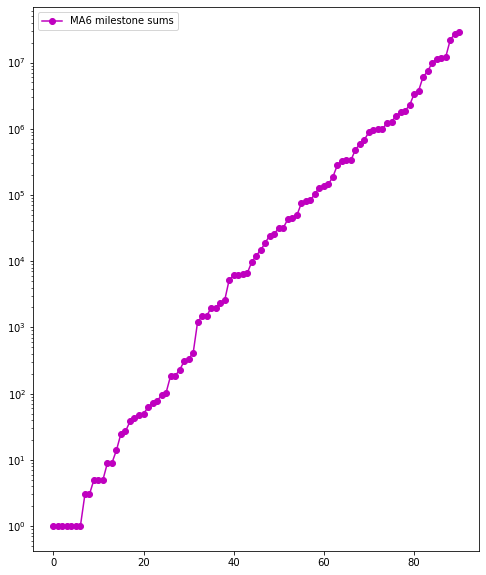

In [16]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(8,10))
plt.yscale("log")
plt.plot(sorted(MA6_pair[0].values()),'m-o', label="MA6 milestone sums")
plt.legend(loc="upper left")

In [11]:
#(sum(MA7_pair[0].values())+sum(MA7_pair[1].values()))/MA6

# Antichains

In [412]:
A6_pair=RemainderCountCollector("AC_Tamari6","temp_")

310
AC_Tamari6_b_[8653238, 3480146]_c_233095_log.txt
AC_Tamari6_b_[12777634, 11728938]_c_8848860_log.txt
AC_Tamari6_b_[13826394, 13826458]_c_255604_log.txt
AC_Tamari6_b_[259814, 2179161]_c_905051205_log.txt
AC_Tamari6_b_[11239784, 8653238]_c_1106_log.txt
AC_Tamari6_b_[11728938, 9631546]_c_124996087_log.txt
AC_Tamari6_b_[5436762, 12533057]_c_172179980_log.txt
AC_Tamari6_b_[12358173, 1291524]_c_4060_log.txt
AC_Tamari6_b_[8775021, 3723712]_c_4270640550_log.txt
AC_Tamari6_b_[13826346, 13826362]_c_167273449_log.txt
AC_Tamari6_b_[1217068, 9981040]_c_5314_log.txt
AC_Tamari6_b_[9502082, 5177834]_c_34913271_log.txt
AC_Tamari6_b_[13830426, 13834522]_c_1906150557_log.txt
AC_Tamari6_b_[5813133, 13285799]_c_2301413_log.txt
AC_Tamari6_b_[12745268, 11664206]_c_34828572_log.txt
AC_Tamari6_b_[11342099, 14745239]_c_20_log.txt
AC_Tamari6_b_[10821582, 6157302]_c_1_log.txt
AC_Tamari6_b_[12996564, 12166798]_c_28983_log.txt
AC_Tamari6_b_[12514316, 11202302]_c_1106_log.txt
AC_Tamari6_b_[13564156, 13301982]_c_

In [413]:
sum(A6_pair[0].values()), sum(A6_pair[1].values())

(138832442543, 0)

In [414]:
A6=sum(A6_pair[0].values())+ sum(A6_pair[1].values())

In [415]:
A6_pair[1].values()

dict_values([])

In [416]:
A6_pair[0].values()

dict_values([233095, 8848860, 255604, 905051205, 1106, 124996087, 172179980, 4060, 4270640550, 167273449, 5314, 34913271, 1906150557, 2301413, 34828572, 20, 1, 28983, 1106, 267405570, 4625172313, 6870204, 30325, 82, 1233720, 1782, 174373, 282708467, 20, 1, 2210957, 284, 1174, 899030078, 1, 376, 23808951, 3143, 459, 177, 129749131, 336124667, 4610034285, 553, 1, 186402269, 19, 831276, 2325566906, 2338, 553, 121197172, 2051404, 1122887560, 1, 1660974, 9103238, 817213, 13178154, 1233720, 224, 3942185287, 942686, 28983, 11, 14492, 102892403, 19357797274, 28946, 231330, 1, 48248, 21256618, 25190046483, 9310048, 4, 7, 68262, 55990, 19249106662, 732568383, 1623234, 964955085, 804, 96111, 110, 28841348, 3351, 4, 189319, 56260152, 15811148, 8601444510, 49471171, 11, 63, 1, 6837827, 794322082, 2338, 155507, 5161683, 302911838, 11, 2481452256, 205872375, 87213, 7439462, 247255, 1560919619, 2556644514, 829, 125, 27822733, 27878, 267905209, 1017378364, 2419978280, 4786423, 2, 3116902504, 6741896676

In [417]:
#A7_pair=RemainderCountCollector("A7_Dyck7","temp_")

In [418]:
#sum(A7_pair[0].values()), sum(A7_pair[1].values())

In [419]:
#sum(A7_pair[0].values())+ sum(A7_pair[1].values())

In [420]:
A6=sum(A6_pair[0].values())+ sum(A6_pair[1].values())

In [422]:
#sum(A6_pair[0].values())/ sum(A6_pair[1].values())


In [423]:
#A7_pair[0].values()

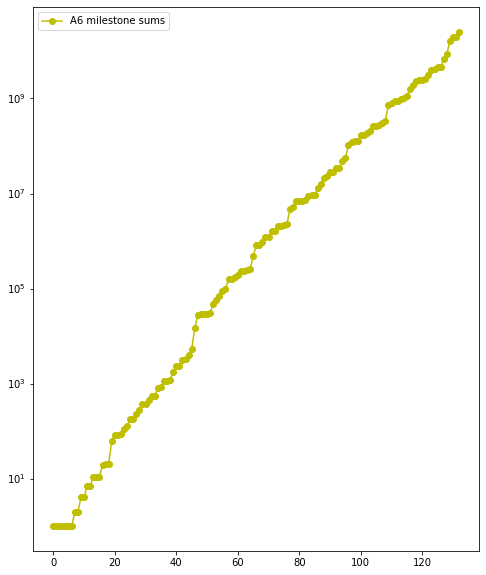

In [424]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(8,10))
plt.yscale("log")
plt.plot(sorted(A6_pair[0].values()),'y-o', label="A6 milestone sums")
plt.legend(loc="upper left")

In [425]:
A6_pair[1].values()

dict_values([])

In [426]:
(sum(A6_pair[0].values())+ sum(A6_pair[1].values()))/AC[5]

4789968.346087497

In [427]:
sorted(A6_pair[0].values())

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 4,
 4,
 7,
 7,
 11,
 11,
 11,
 19,
 20,
 20,
 63,
 82,
 82,
 86,
 110,
 125,
 177,
 177,
 224,
 284,
 376,
 376,
 459,
 553,
 553,
 804,
 829,
 1106,
 1106,
 1174,
 1782,
 2338,
 2338,
 3143,
 3351,
 4060,
 5314,
 14492,
 27878,
 28946,
 28983,
 28983,
 30325,
 48248,
 55990,
 68262,
 87213,
 96111,
 155507,
 155507,
 174373,
 189319,
 231330,
 233095,
 247255,
 255604,
 476996,
 817213,
 831276,
 942686,
 1233720,
 1233720,
 1623234,
 1660974,
 2051404,
 2051404,
 2210957,
 2301413,
 4786423,
 5161683,
 6837827,
 6837827,
 6870204,
 7439462,
 8848860,
 9103238,
 9310048,
 13178154,
 15811148,
 21256618,
 23808951,
 27822733,
 28841348,
 34828572,
 34913271,
 49471171,
 56260152,
 102892403,
 121197172,
 124996087,
 129749131,
 167273449,
 172179980,
 186402269,
 205872375,
 267405570,
 267905209,
 282708467,
 302911838,
 336124667,
 732568383,
 794322082,
 899030078,
 905051205,
 964955085,
 1017378364,
 1122887560,
 1560919619,
 1906150557,
 23255

# Plots

In [428]:
AC=[2, 2, 3, 8, 83, 28984]

In [433]:
MA=[1, 1, 2, 4, 26, 1979, 161117453]

In [434]:
MA6=MA[6]

In [435]:
from matplotlib import pyplot as plt 

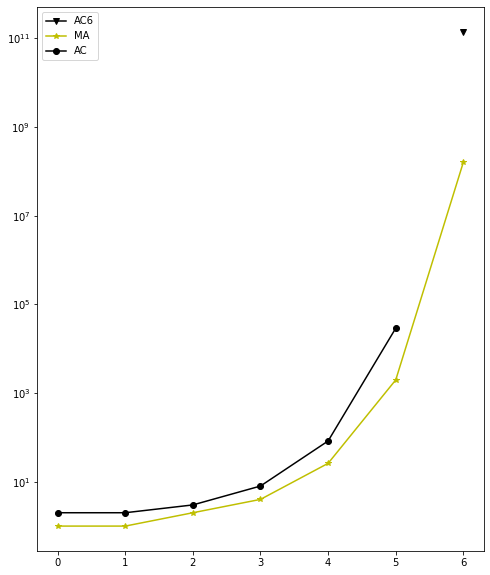

In [436]:
plt.figure(figsize=(8,10))
plt.yscale("log")
#plt.plot([6],[MA6],'y-v', label="MA6")
plt.plot([6],[A6], 'k-v', label="AC6")
plt.plot(MA,'y-*', label="MA")
plt.plot(AC, 'k-o', label="AC")


plt.legend(loc="upper left")



In [437]:
AC_MA=[AC[n]/MA[n] for n in range(6)]

In [438]:
AC_MA

[2.0, 2.0, 1.5, 2.0, 3.1923076923076925, 14.64578069732188]

In [439]:
from math import log, exp
log_log_AC_MA=[log(log(AC[n]/MA[n])) for n in range(6)]

In [440]:
log(2.72)

1.000631880307906

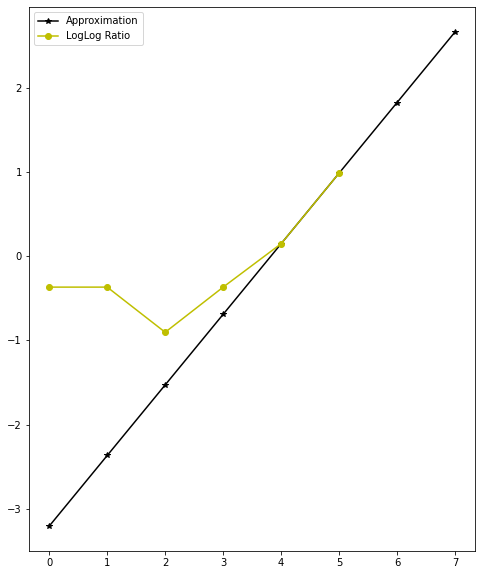

In [441]:
plt.figure(figsize=(8,10))
#plt.yscale("log")
plt.plot(line,'k-*', label="Approximation")
#plt.plot([7],[A7/MA7],'m-v', label="Current value")
plt.plot(log_log_AC_MA,'y-o', label="LogLog Ratio")
plt.legend(loc="upper left")

In [442]:
log_log_AC_MA

[-0.36651292058166435,
 -0.36651292058166435,
 -0.90272045571788,
 -0.36651292058166435,
 0.1490612389452188,
 0.9873649563121998]

In [443]:
a=log_log_AC_MA[5]-log_log_AC_MA[4]

In [444]:
b=log_log_AC_MA[5]-5*a

In [445]:
a,b

(0.838303717366981, -3.204153630522705)

In [446]:
line=[a*x+b for x in range(8)]

In [447]:
line

[-3.204153630522705,
 -2.3658499131557242,
 -1.527546195788743,
 -0.6892424784217619,
 0.14906123894521883,
 0.9873649563121996,
 1.8256686736791812,
 2.663972391046162]

In [448]:
exp(exp(line[-1]))

1712033.658675704

In [449]:
AC[5]/MA[5]

14.64578069732188

In [450]:
log_AC=[log(AC[n]) for n in range(6)]

In [451]:
log_MA=[log(MA[n]) for n in range(6)]

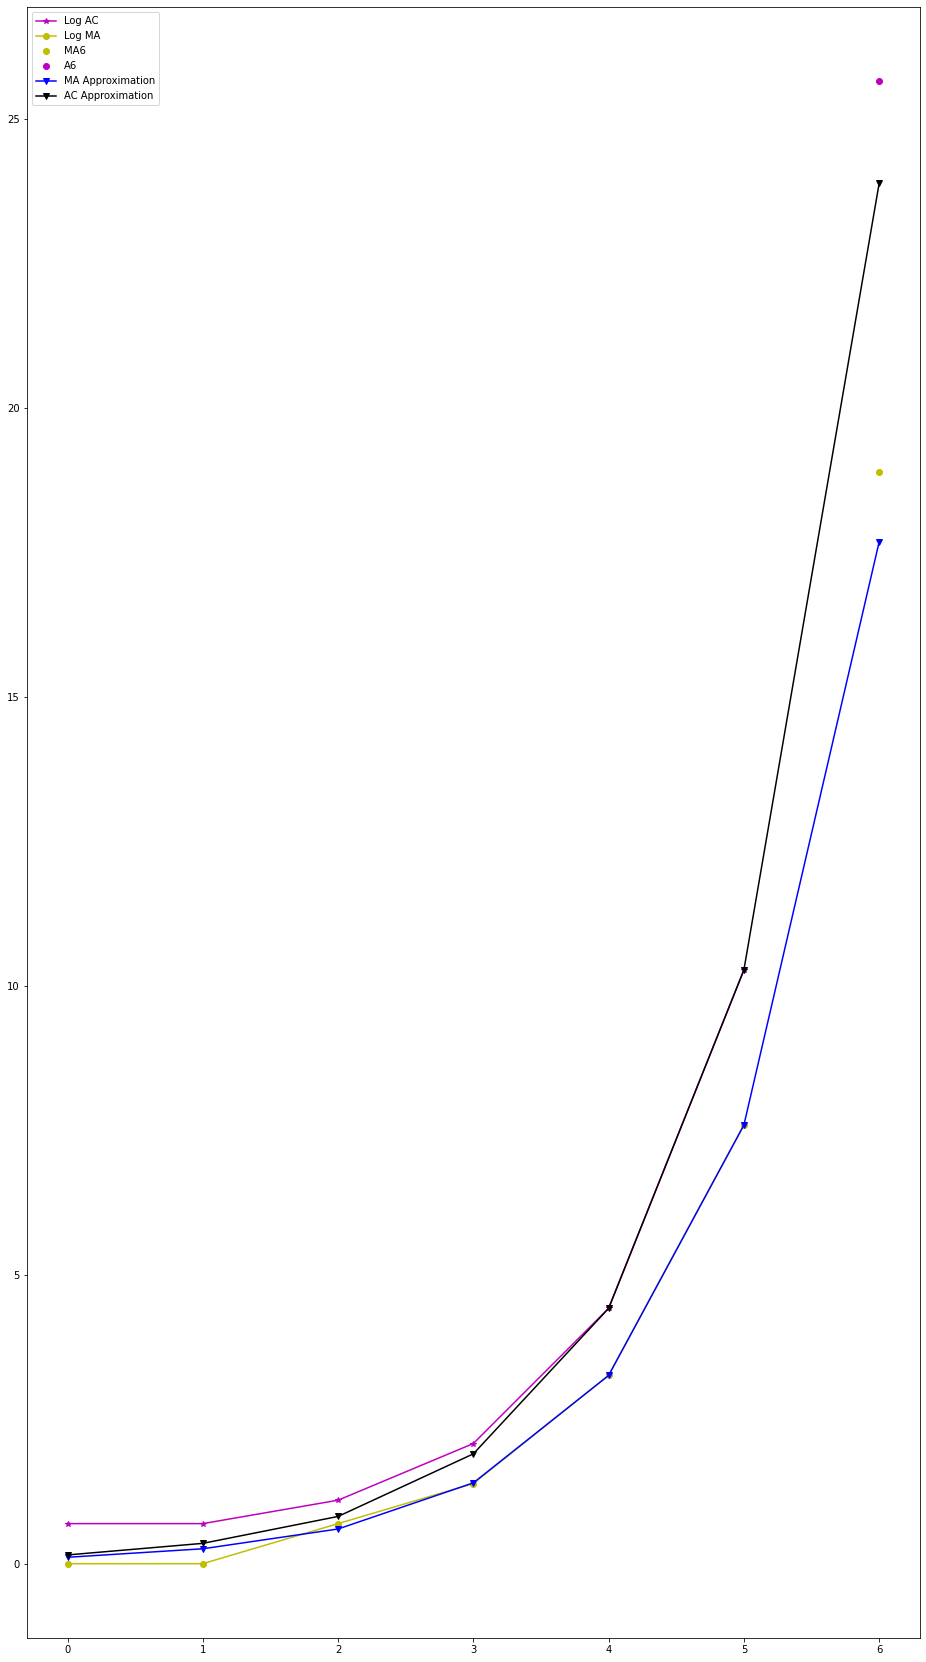

In [452]:
plt.figure(figsize=(16,30))
#plt.yscale("log")
#plt.xscale("log")

plt.xticks(list(range(10)))

plt.plot(log_AC,'m-*', label="Log AC")
plt.plot(log_MA,'y-o', label="Log MA")
plt.plot([6],log(MA[6]),'yo', label="MA6")
plt.plot([6],log(A6),'mo', label="A6")
plt.plot(curve,'b-v', label="MA Approximation")
plt.plot(curve_AC,'k-v', label="AC Approximation")
#plt.plot(curve_AC_45,'g-*', label="AC Approximation")


plt.legend(loc="upper left")

In [453]:
a=log_MA[-2]-log_MA[-1]

In [454]:
a

-4.332250407581084

In [455]:
b=log_MA[-1]-5*a

In [456]:
b

29.251598983507986

In [457]:
line2=[a*x+b for x in range(7)]

In [458]:
line2

[29.251598983507986,
 24.919348575926904,
 20.58709816834582,
 16.254847760764733,
 11.92259735318365,
 7.590346945602565,
 3.2580965380214835]

In [459]:
curve=[(log_MA[-1]**(n-4))/(log_MA[-2]**(n-5)) for n in range(7)]

In [460]:
curve[-1]

17.68313678931214

In [461]:
exp(curve[-1]), MA[6]

(47828716.91316059, 161117453)

In [462]:
exp(curve[-1])/MA[6]

0.2968562127975086

In [463]:
curve

[0.1106046108948173,
 0.25767418511940393,
 0.6003003413672338,
 1.3985122323318084,
 3.258096538021482,
 7.590346945602565,
 17.68313678931214]

In [464]:
log(MA[6])

18.89764417871623

In [465]:
exp(curve[-1])/MA6

0.2968562127975086

In [466]:
MA6/exp(curve[-1])

3.3686342306135915

In [467]:
curve_AC=[(log_AC[-1]**(n-4))/(log_AC[-2]**(n-5)) for n in range(7)]

In [468]:
curve_AC

[0.15118163079666072,
 0.3515210634343872,
 0.8173417457325897,
 1.9004480778202095,
 4.418840607796598,
 10.274499232574913,
 23.889826280206417]

In [469]:
exp(curve_AC[-1]), A6

(23725737829.648983, 138832442543)

In [470]:
exp(curve_AC[-1])/A6

0.17089476634613346

In [471]:
1/exp(curve_AC[-1])*A6

5.851554271560203

In [472]:
log(A6)/log_AC[-1]

2.4971079380944072

In [473]:
log_AC[-1]/log_AC[-2]

2.325157240215136

In [474]:
log_MA[-1]/log_MA[-2]

2.3296875513123667

In [475]:
exp(1)

2.718281828459045

In [476]:
curve_AC_45=[(log_AC[-2]**(n-4))/(log_AC[-3]**(n-5)) for n in range(8)]

In [477]:
exp(curve_AC_45[6]), A6

(11969.22883718026, 138832442543)

In [379]:
A6/exp(curve_AC_45[6])

11399430.8168097

In [228]:
#28763702470876/A7